In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

from statsmodels.tsa.stattools import adfuller, kpss

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import matplotlib as mpl

import seaborn as sns

plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

import warnings
warnings.filterwarnings('ignore')

import scipy.stats as scs
import statsmodels.api as sm

# import statsmodels as smt

# Литература

https://www.springer.com/gp/book/9780387759586

# Сравнение временных рядов

https://basegroup.ru/community/bank/compare-model

# Сезонная ARIMA

http://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/

# Coursera

https://www.coursera.org/learn/practical-time-series-analysis

# Хабр

https://habr.com/ru/company/ods/blog/327242/

# ARIMA vs RF

https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-15-276

# INTRO

На абсолютно эффективных рынках наилучшим прогнозом будущего уровня цены финансового актива является текущая цена этого актива. 

Поэтому понятие **мартингала** стало одним из основных при исследовании динамики эволюции цен как стохастических
последовательностей или процессов с определёнными свойствами их распределений. 


# Линейные модели

В теории временных рядов есть целый арсенал разнообразных линейных моделей,
среди которых в первую очередь нужно назвать следующие:


- Модель скользящего среднего порядка 𝑞 MA(𝑞),
- Модель авторегрессии порядка 𝑝 AR(𝑝),
- Модель авторегрессии и скользящего среднего порядка ARMA(𝑝, 𝑞)

Они весьма просты, но
при этом ими можно неплохо приближать весьма широкий класс стационарных последовательностей.





# Стационарность ( в общем смысле)

Под стационарностью понимают свойство процесса не менять своих статистических характеристик с течением времени, а именно постоянство матожидания, постоянство дисперсии (она же гомоскедастичность) и независимость ковариационной функции от времени (должна зависеть только от расстояния между наблюдениями). 

Временной ряд $y_1, . . . , y_T$ называется
стационарным, если ∀s (ширина окна) распределение $y_t, . . . , y_{t+s}$ не зависит от t, т.е. его свойства не зависят
от времени.


- Ряды, в которых присутствует тренд, являются нестационарными: в
зависимости от расположения окна изменяется средний уровень ряда. 

- Нестационарны ряды с сезонностью: если ширина окна меньше сезонного периода, то распределение ряда будет разным, в зависимости
от положения окна. 

- Ряды, в которых есть непериодические циклы, не обязательно являются нестационарными, поскольку нельзя заранее предсказать положение максимумов и минимумов
этого ряда.

Формально гипотезу о стационарности можно проверить с помощью критерия Дики-Фуллера.

# Компоненты временных рядов



Анализ показывает, что часто в данных вырисовываются четыре составляющие:


• Тренд — плавное долгосрочное изменение уровня ряда. Эту характеристику можно получить, наблюдая
ряд в течение достаточно долгого времени.


• Сезонность — циклические изменения уровня ряда с постоянным периодом. В данных о средней зарплате в России очень хорошо видны подобные сезонные колебания: признак всегда принимает
максимальное значение в декабре каждого года, а минимальное — в январе следующего года. В целом
профиль изменения зарплаты внутри года остаётся более-менее постоянным.


• Цикл — изменение уровня ряда с переменным периодом. Такое поведение часто встречается в рядах,
связанных с продажами, и объясняется циклическими изменениями экономической активности. В экономике выделяют циклы длиной 4 − 5 лет, 7 − 11 лет, 45 − 50 лет и т. д. Другой пример ряда с такой
характеристикой — это солнечная активность, которая соответствует, например, количеству солнечных
пятен за день. Она плавно меняется с периодом, который составляет несколько лет, причём сам период
также меняется во времени.


• Ошибка — непрогнозируемая случайная компонента ряда. Сюда включены все те характеристики временного ряда, которые сложно измерить (например, слишком слабые).


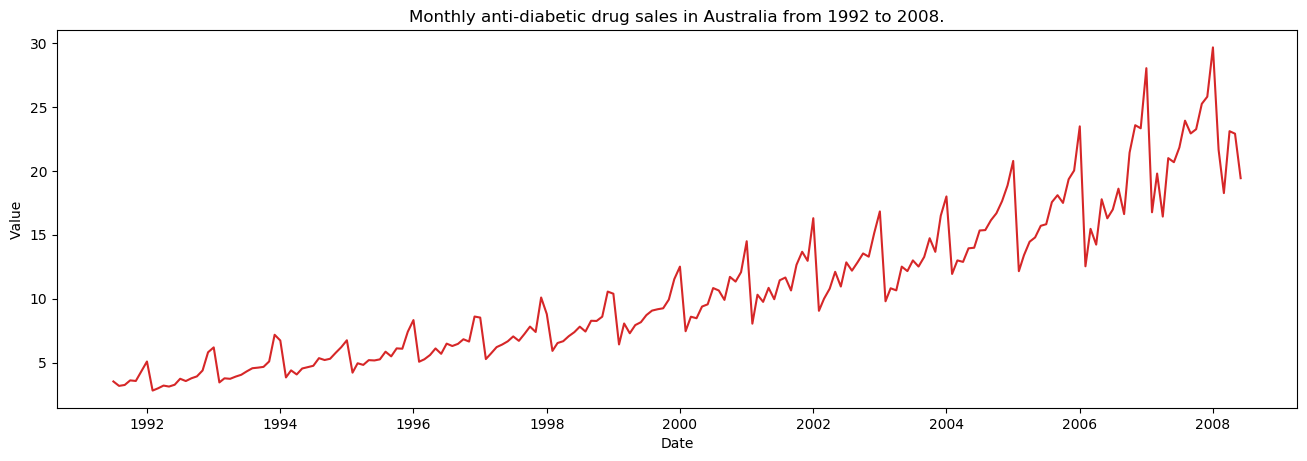

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')    


# Additive TS:
Value = Base Level + Trend + Seasonality + Error

# Multiplicative TS:
Value = Base Level x Trend x Seasonality x Error


Заметим, что

$$ y_t  = S_t × T_t × R_t$$ эквивалентно
$$\log y_t = \log S_t + \log T_t + \log R_t.$$

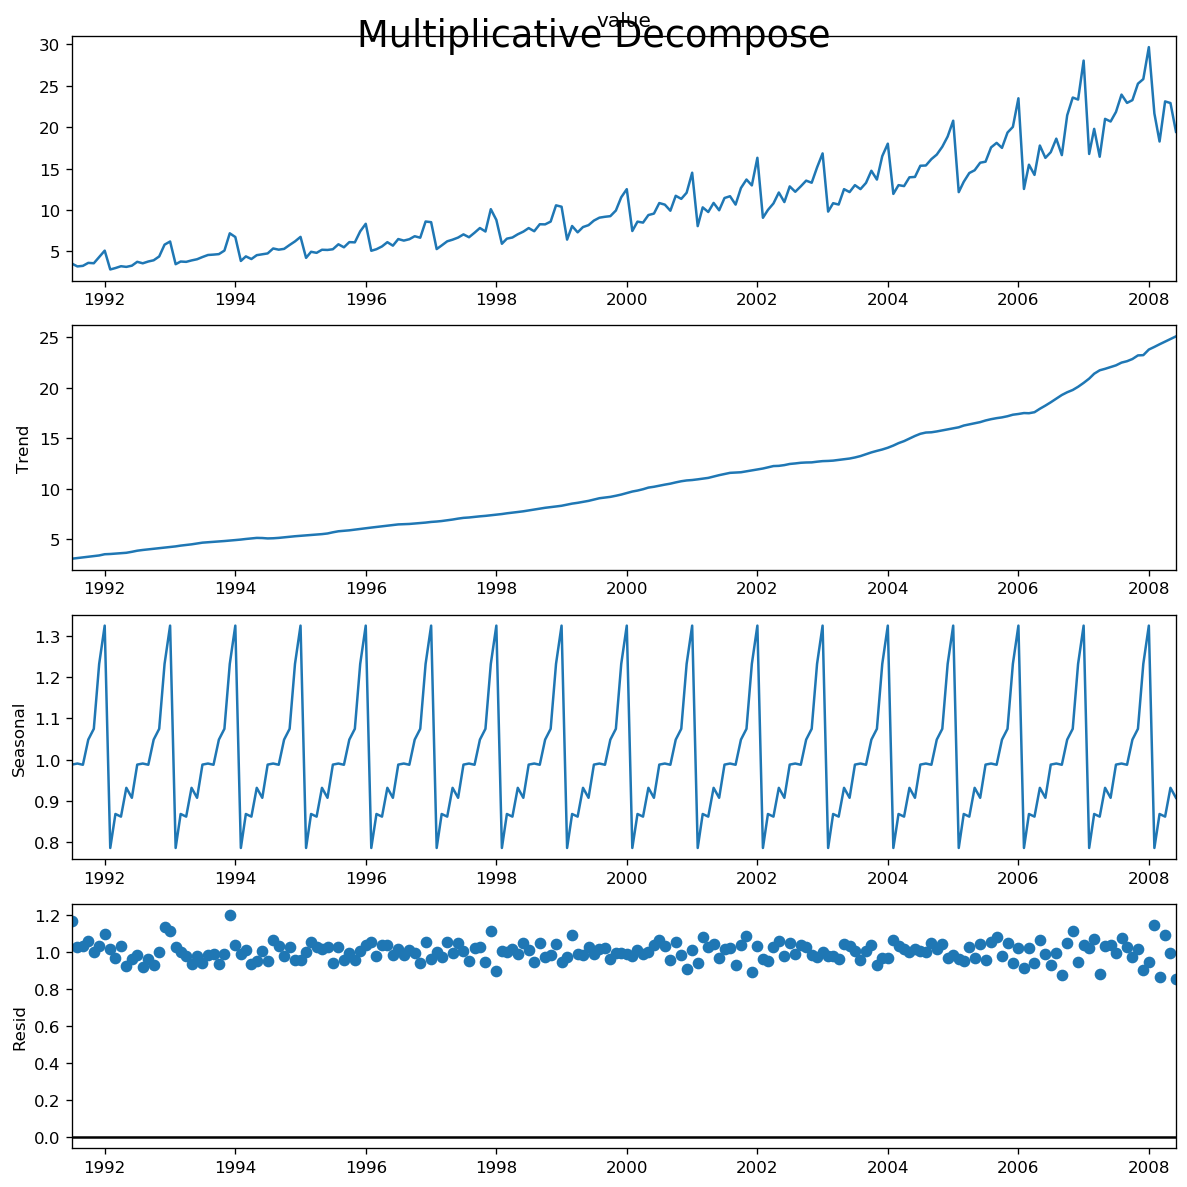

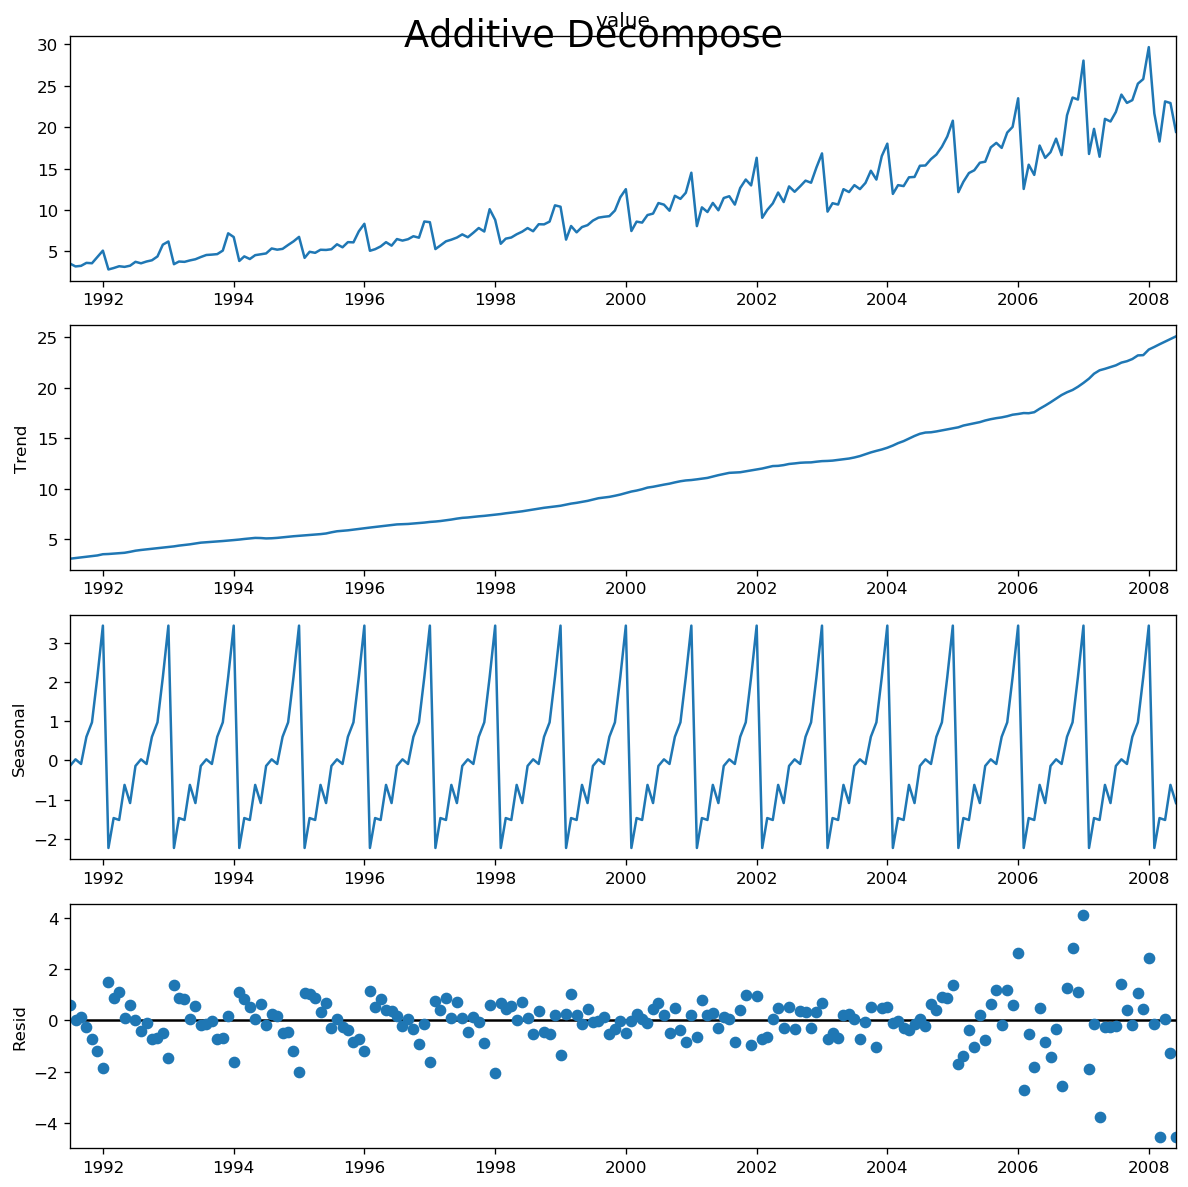

In [3]:

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

## Замечание:

Остатки для аддитивной модели имеют некоторый паттерн поведения. Остатки мультипликативной модели выглядят более случайными. Вторая модель предпочтительнее.

In [4]:
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
date,,,,
1991-07-01,0.987845,3.060085,1.166629,3.526591
1991-08-01,0.990481,3.124765,1.027745,3.180891
1991-09-01,0.987476,3.189445,1.032615,3.252221
1991-10-01,1.048329,3.254125,1.058513,3.611003
1991-11-01,1.074527,3.318805,0.999923,3.565869


# Measuring strength of trend and seasonality
A time series decomposition can be used to measure the strength of trend and seasonality in a time series (Wang, Smith, & Hyndman, 2006). 

Recall that the decomposition is written as
$$y_t=T_t+S_t+R_t,$$
 
where  
$T_t$
  is the smoothed trend component,  
$S_t$
  is the seasonal component and  
$R_t$
  is a remainder component. 
  
  For strongly trended data, the seasonally adjusted data should have much more variation than the remainder component. Therefore $Var (R_t) /Var(T_t+R_t)$   should be relatively small. 
  
  But for data with little or no trend, the two variances should be approximately the same. So we define the strength of trend as:
$$F_T = \max(0,1−\frac{Var(R_t)}{Var(T_t+R_t)}).$$

This will give a measure of the strength of the trend between 0 and 1. Because the variance of the remainder might occasionally be even larger than the variance of the seasonally adjusted data, we set the minimal possible value of  
$F_T$   equal to zero.

The strength of seasonality is defined similarly, but with respect to the detrended data rather than the seasonally adjusted data:
$$F_S = \max(0,1−\frac{Var(R_t)}{Var(S_t+R_t)}).$$

A series with seasonal strength  
$F_S$   close to 0 exhibits almost no seasonality, while a series with strong seasonality will have  $F_S$   close to 1 because $ Var(R_t)$
  will be much smaller than $ Var(S_t+R_t) .$

These measures can be useful, for example, when there you have a large collection of time series, and you need to find the series with the most trend or the most seasonality.

# Стационарность модели:

- Взять разность
- Взять логарифм
- Взять n-ый корень
- Комбинация указанного выше

# Проверка стационарности:

- Пристальное вглядывание в график временного ряда
- Разбиение на части и подсчет статистик
- Тесты на единичные корни
 - Dickey Fuller test (ADH Test)
 - Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)
 - Philips Perron test (PP Test)

Чаще всего используют тест Дикки Фуллера, нулевая гипотеза о нестационарности ряда. Если p значение меньше уровня значимости(0.05) - гипотеза отклоняется в пользу альтернативы.

![picture](https://otexts.com/fpp2/fpp_files/figure-html/stationary-1.png)

(a) Google stock price for 200 consecutive days; 

(b) Daily change in the Google stock price for 200 consecutive days; 

(c) Annual number of strikes in the US; 

(d) Monthly sales of new one-family houses sold in the US; 

(e) Annual price of a dozen eggs in the US (constant dollars); 

(f) Monthly total of pigs slaughtered in Victoria, Australia; 

(g) Annual total of lynx trapped in the McKenzie River district of north-west Canada; 

(h) Monthly Australian beer production; 

(i) Monthly Australian electricity production.

Obvious seasonality rules out series (d), (h) and (i). 

Trends and changing levels rules out series (a), (c), (e), (f) and (i). 

Increasing variance also rules out (i). 

That leaves only (b) and (g) as stationary series.

At first glance, the strong cycles in series (g) might appear to make it non-stationary. 

But these cycles are aperiodic — they are caused when the lynx population becomes too large for the available feed, so that they stop breeding and the population falls to low numbers, then the regeneration of their food sources allows the population to grow again, and so on. 2

In the long-term, the timing of these cycles is not predictable. 

Hence the series is stationary.

# Взятие разности


Важный трюк, который позволяет сделать ряд стационарным, — это дифференцирование, переход к попарным разностям соседних значений:
$$y' = y_t − y_{t−1}$$

Для нестационарного ряда часто оказывается, что получаемый после дифференцирования ряд является
стационарным. 

Дифференцирование можно применять неоднократно: от ряда первых
разностей, продифференцировав его, можно прийти к ряду вторых разностей, и т. д.


Также может применяться сезонное дифференцирование ряда, переход к попарным разностям значений
в соседних сезонах. Если длина периода сезона составляет s, то новый ряд задаётся разностями
$$y'_t = y_t − y_{t−s}.$$


Сезонное и обычное дифференцирование могут применяться к ряду в любом порядке. Однако если у ряда
есть ярко выраженный сезонный профиль, то рекомендуется начинать с сезонного дифференцирования, уже
после такого преобразования может оказаться, что ряд стационарен.


![picture](https://otexts.com/fpp2/fpp_files/figure-html/a10diff-1.png)

# Стабилизация дисперсии

В случае, если во временном ряде монотонно по времени изменяется дисперсия, применяется специальное преобразование, стабилизирующее дисперсию.

 Очень часто в качестве такого преобразования выступает логарифмирование. 
 
Логарифмирование принадлежит к семейству преобразований Бокса-Кокса.

$$y_t' =\begin{cases}
\ln y_t, \lambda=0 \\
(y_t^\lambda - 1)/\lambda, \lambda \neq 0
\end{cases} $$


Это параметрическое семейство функций, в котором параметр λ определяет, как именно будет преобразован
ряд: 

λ = 0 — это логарифмирование, 

λ = 1 — тождественное преобразование ряда, 

а при других значениях
λ — степенное преобразование.

 Значение параметра можно подбирать так, чтобы дисперсия была как можно
более стабильной во времени.


In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])

# ADF Test
result = adfuller(df.value.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


ADF Statistic: 3.14518568930673
p-value: 1.0
Critial Values:
   1%, -3.465620397124192
Critial Values:
   5%, -2.8770397560752436
Critial Values:
   10%, -2.5750324547306476


# Как избавиться от тренда?

- Воспользоваться линейной регрессией на шаг временного ряда ( используя также степенные компоненты)
- Вычесть среднее
- Baxter-King filter(statsmodels.tsa.filters.bkfilter) или Hodrick-Prescott Filter (statsmodels.tsa.filters.hpfilter) чтобы убрать среднее или циклическую компоненту

Text(0.5, 1.0, 'Drug Sales detrended by subtracting the least squares fit')

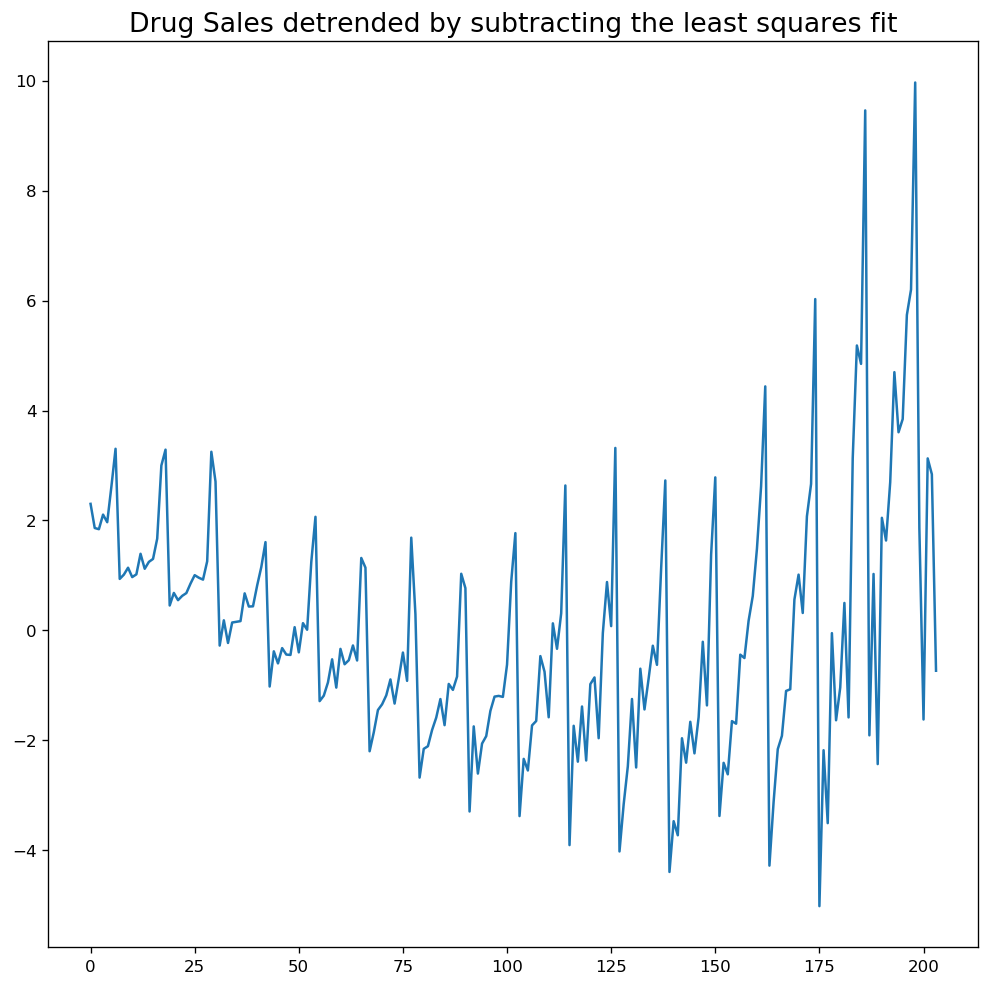

In [6]:
# Using scipy: Subtract the line of best fit
from scipy import signal
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
detrended = signal.detrend(df.value.values)
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the least squares fit', fontsize=16)

Text(0.5, 1.0, 'Drug Sales detrended by subtracting the trend component')

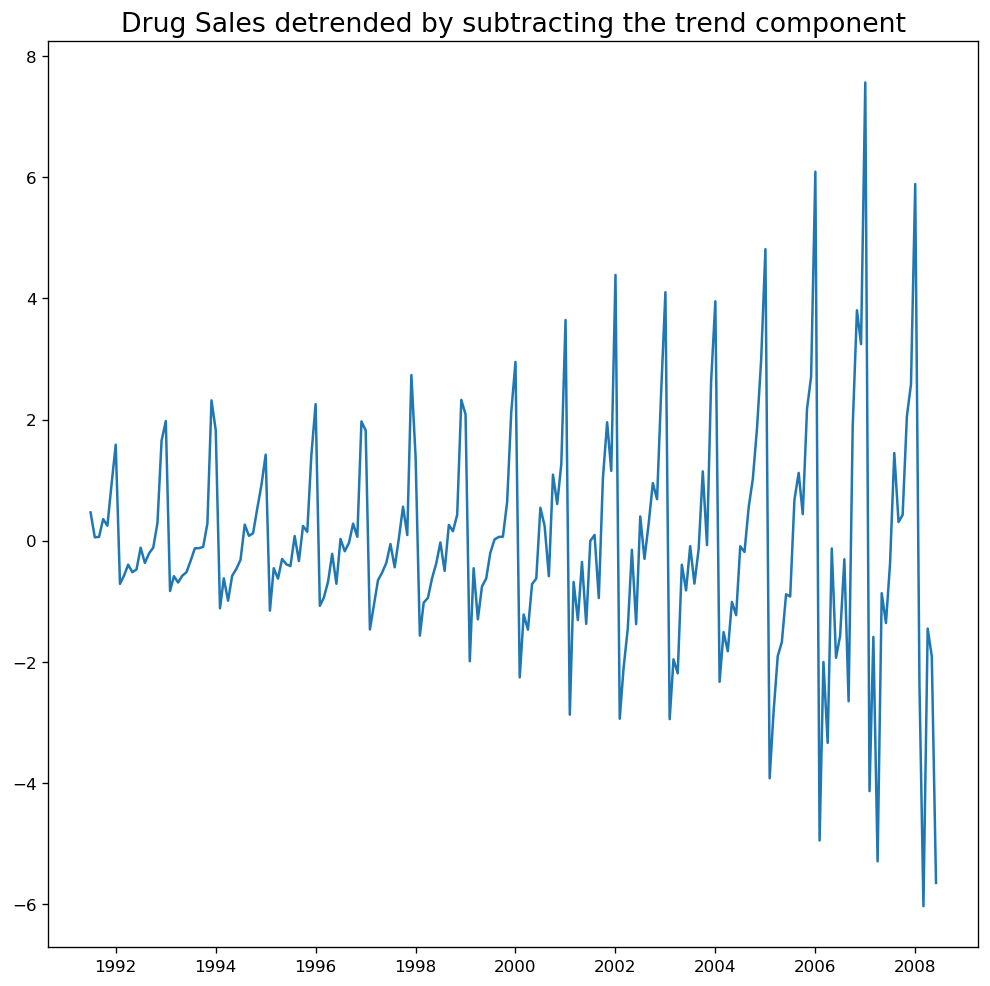

In [7]:
# Using statmodels: Subtracting the Trend Component.
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')
detrended = df.value.values - result_mul.trend
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the trend component', fontsize=16)

# Как учесть сезонность?


- 1. Скользящее среднее с сезонным окном. 

- 2. Сезонные разности

- 3. Разбить ряд по временным индексами

[]

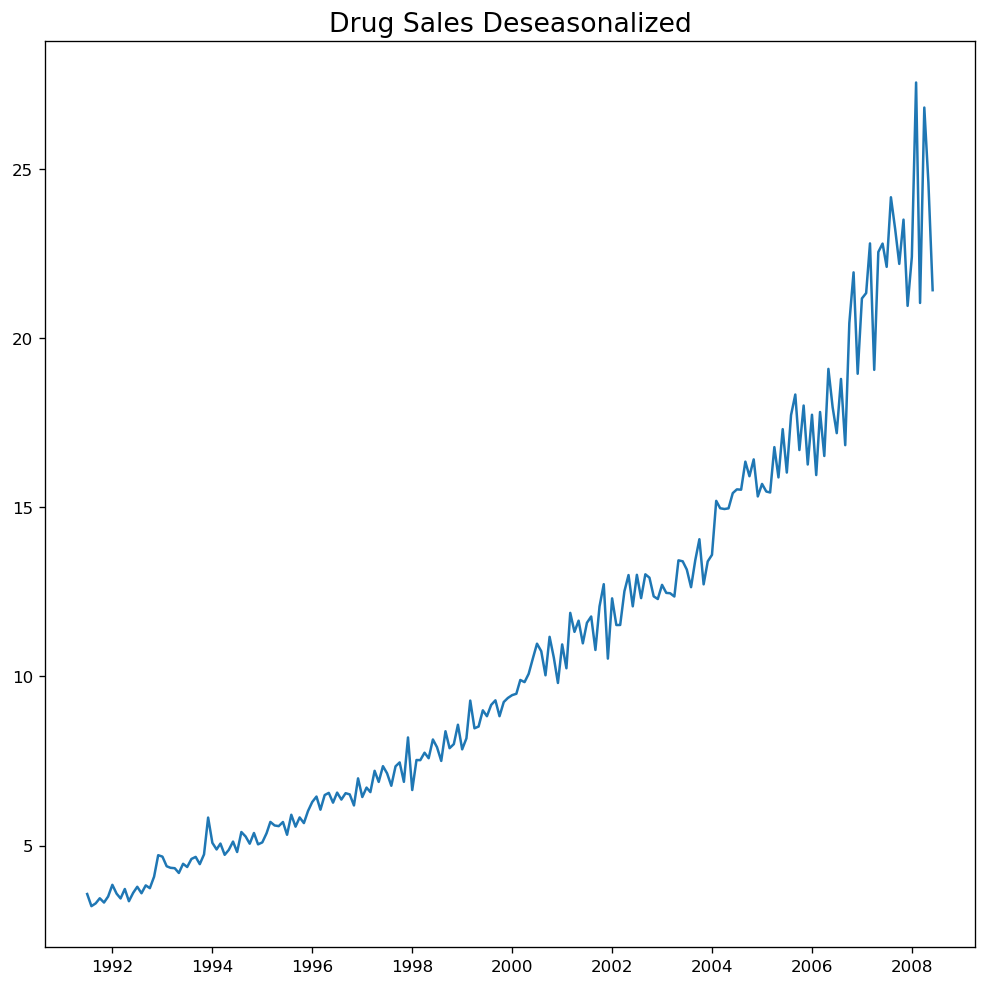

In [8]:
# Subtracting the Trend Component.
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Time Series Decomposition
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Deseasonalize
deseasonalized = df.value.values / result_mul.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('Drug Sales Deseasonalized', fontsize=16)
plt.plot()

# Тест на сезонность:

- По часам
- По дням (месяца)
- По неделям
- По месяцам
- По годам

- На графике ACF ( пики на 12,24,36 периоде).

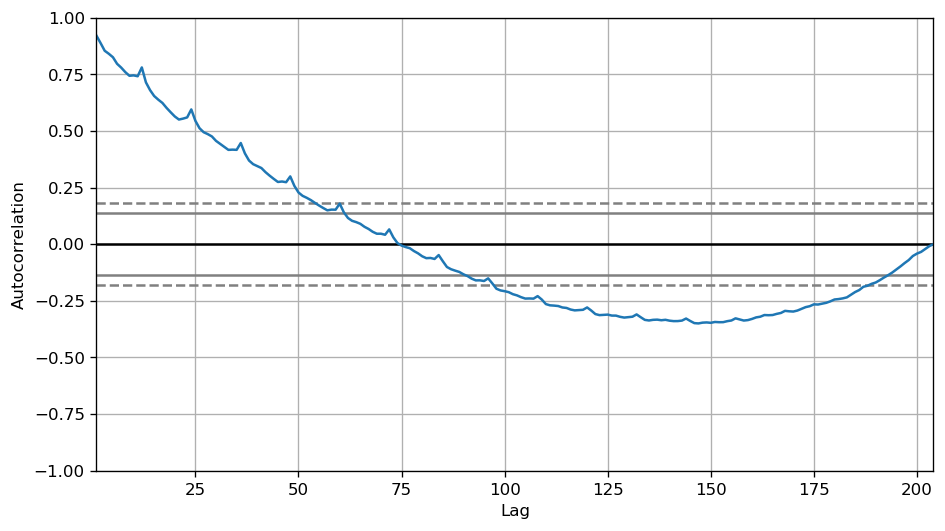

In [9]:
from pandas.plotting import autocorrelation_plot
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')

# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})

autocorrelation_plot(df.value.tolist())

# ACF PCF

# ACF

Количественной характеристикой сходства между значениями ряда в соседних точках является автокорреляционная функция (или просто автокорреляция), которая задаётся следующим соотношением:
$$r_τ = \frac{E((y_t − Ey)(y_{t-τ} − Ey))}{Dy}$$

**Автокорреляция** — это уже встречавшаяся ранее корреляция Пирсона между исходным рядом и его версией,
сдвинутой на несколько отсчётов. Количество отсчётов, на которое сдвинут ряд, называется лагом автокорреляции (τ ).

Вычислить автокорреляцию по выборке можно, заменив в формуле математическое ожидание на выборочное среднее, а дисперсию — на выборочную дисперсию.

Анализировать величину автокорреляции при разных значениях лагов удобно с помощью графика, который называется коррелограммой. По оси ординат на нём откладывается автокорреляция, а по оси абсцисс —
размер лага τ.

Как и для обычной корреляции Пирсона,
значимость вычисляется с помощью критерия Стьюдента. Альтернатива чаще всего двусторонняя, потому что при анализе временных рядов крайне редко имеется гипотеза о том, какой должна быть
корреляция, положительной или отрицательной.


временной ряд: $y^T = y_1, . . . , y_T$

нулевая гипотеза: $H_0 : r_τ = 0$

альтернатива: $H_1 : r_τ \neq 0$

статистика: $T(y^T) =\frac{ r_τ \sqrt{T - τ−2}}{\sqrt{1−r^2_τ}};$

нулевое распределение: $T(y^T) ∼ St(T − τ − 2).$





# PACF

Частичная автокорреляция - это сводка взаимосвязи между наблюдением во временном ряду с наблюдениями на предыдущих временных этапах с удалением взаимосвязей между промежуточными наблюдениями.

**Частичная автокорреляция** при лаге k - это корреляция, возникающая после устранения влияния любых корреляций, связанных с членами с более короткими лагами.


Поскольку автоковариация стационарного  ряда зависит только от сдвига, то и автокорреляция – это функция только сдвига k,
$$ρ(k) = \frac{cov(y_t, y_{t−k} )}{σ^2_y} = \frac{γ(k)}{γ(0)}, k ≥ 0.$$


 По сути, вместо того, чтобы находить корреляции настоящего с лагами, такими как ACF, он находит корреляцию остатков (которая сохраняется после устранения эффектов, которые уже были объяснены более ранним лагом (ами)) со следующим значением лага, следовательно, «частичным», а не «полным». 
 


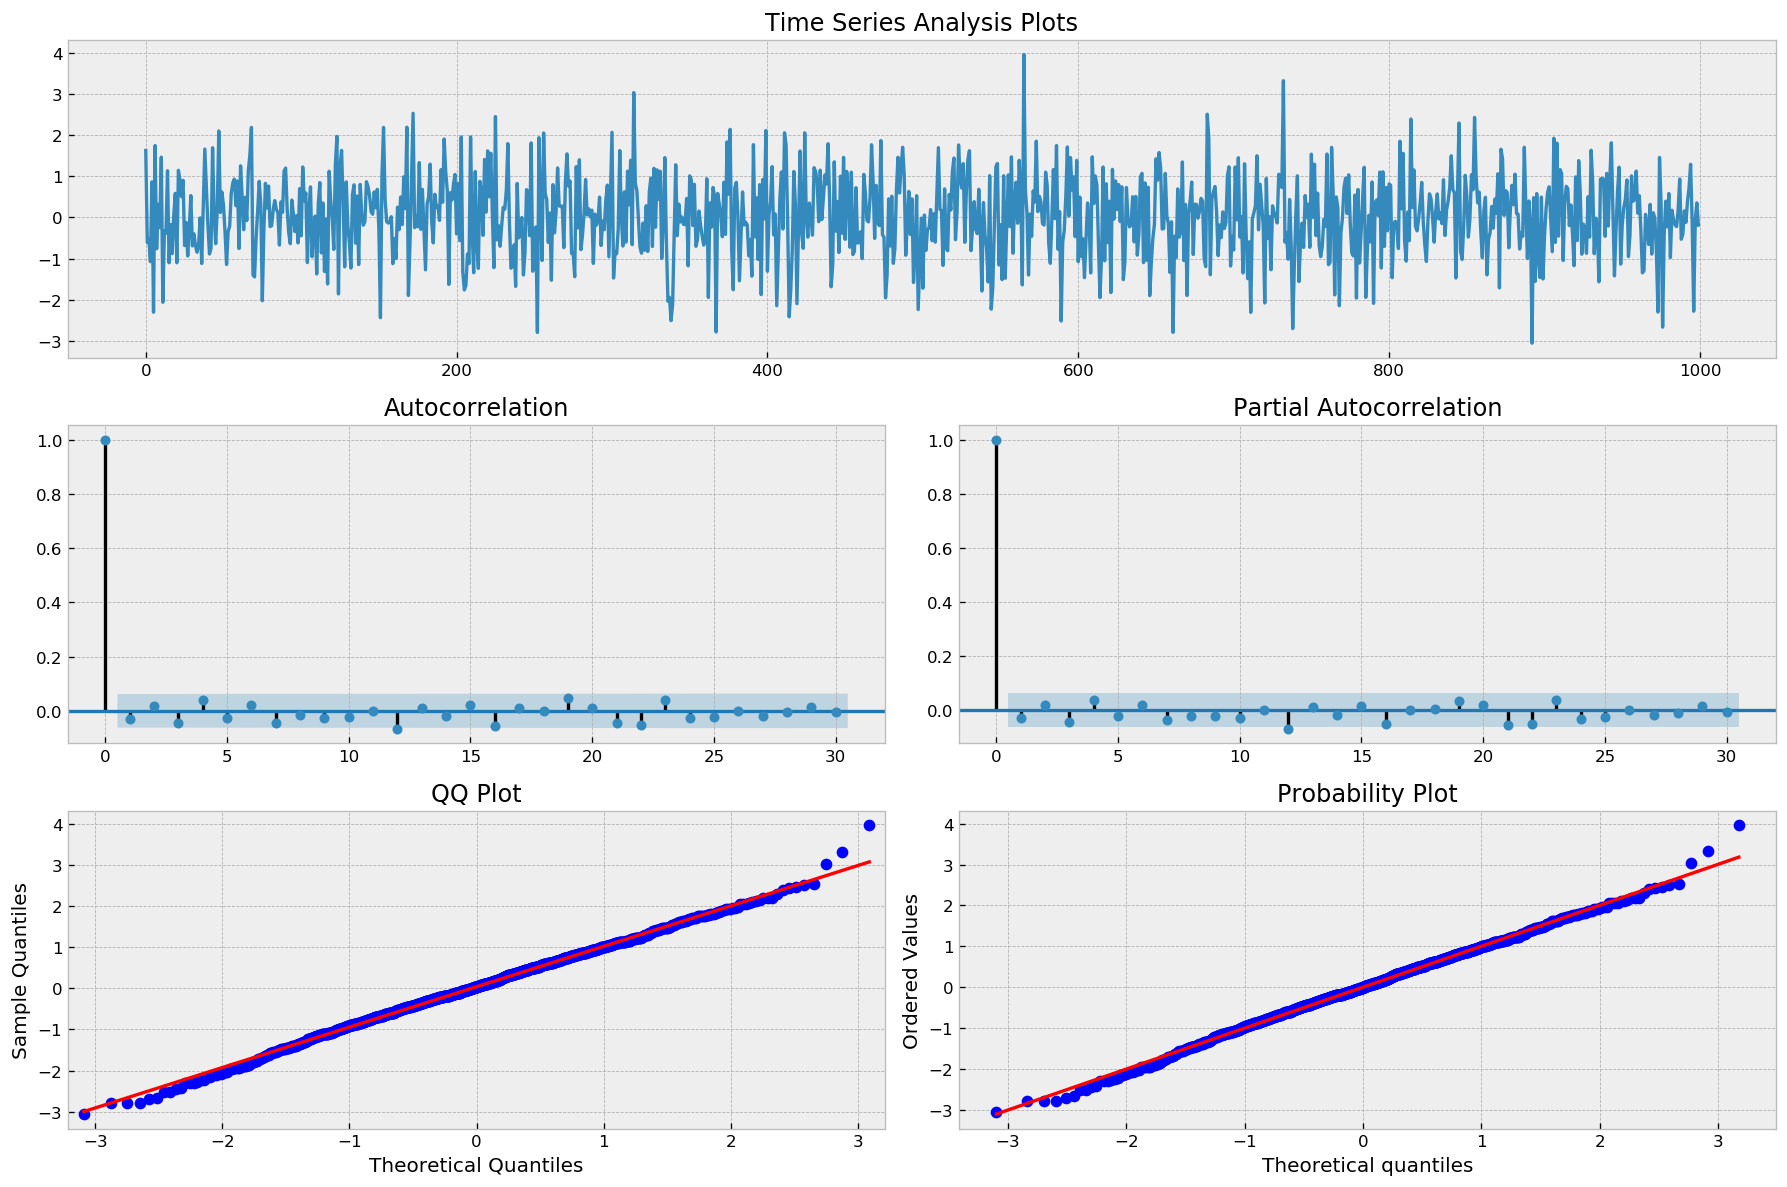

In [10]:

def tsplot(y, lags=None, figsize=(15, 10), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        
        sm.graphics.tsa.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        sm.graphics.tsa.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return

np.random.seed(1)

# plot of discrete white noise
randser = np.random.normal(size=1000)
tsplot(randser, lags=30)


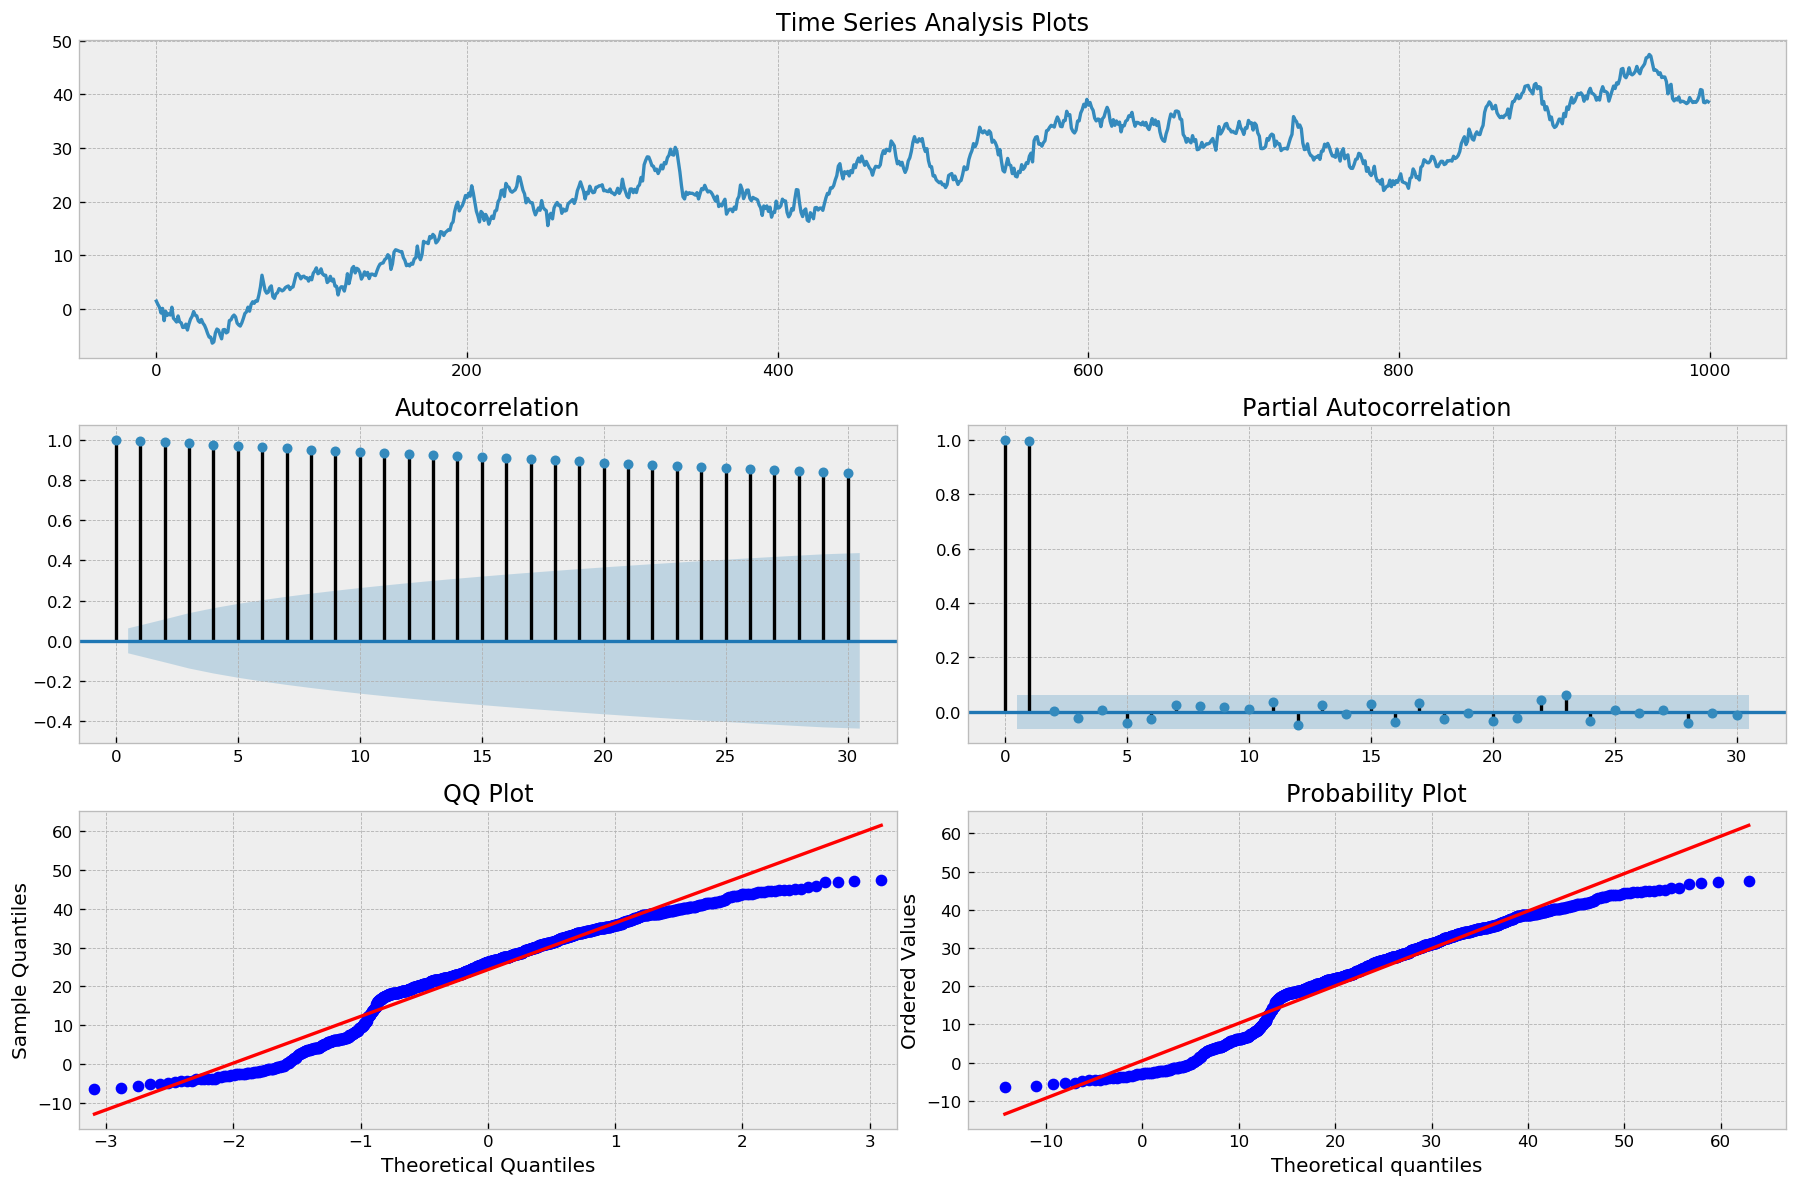

In [11]:

# Random Walk without a drift

np.random.seed(1)
n_samples = 1000

x = w = np.random.normal(size=n_samples)
for t in range(n_samples):
    x[t] = x[t-1] + w[t]

_ = tsplot(x, lags=30)

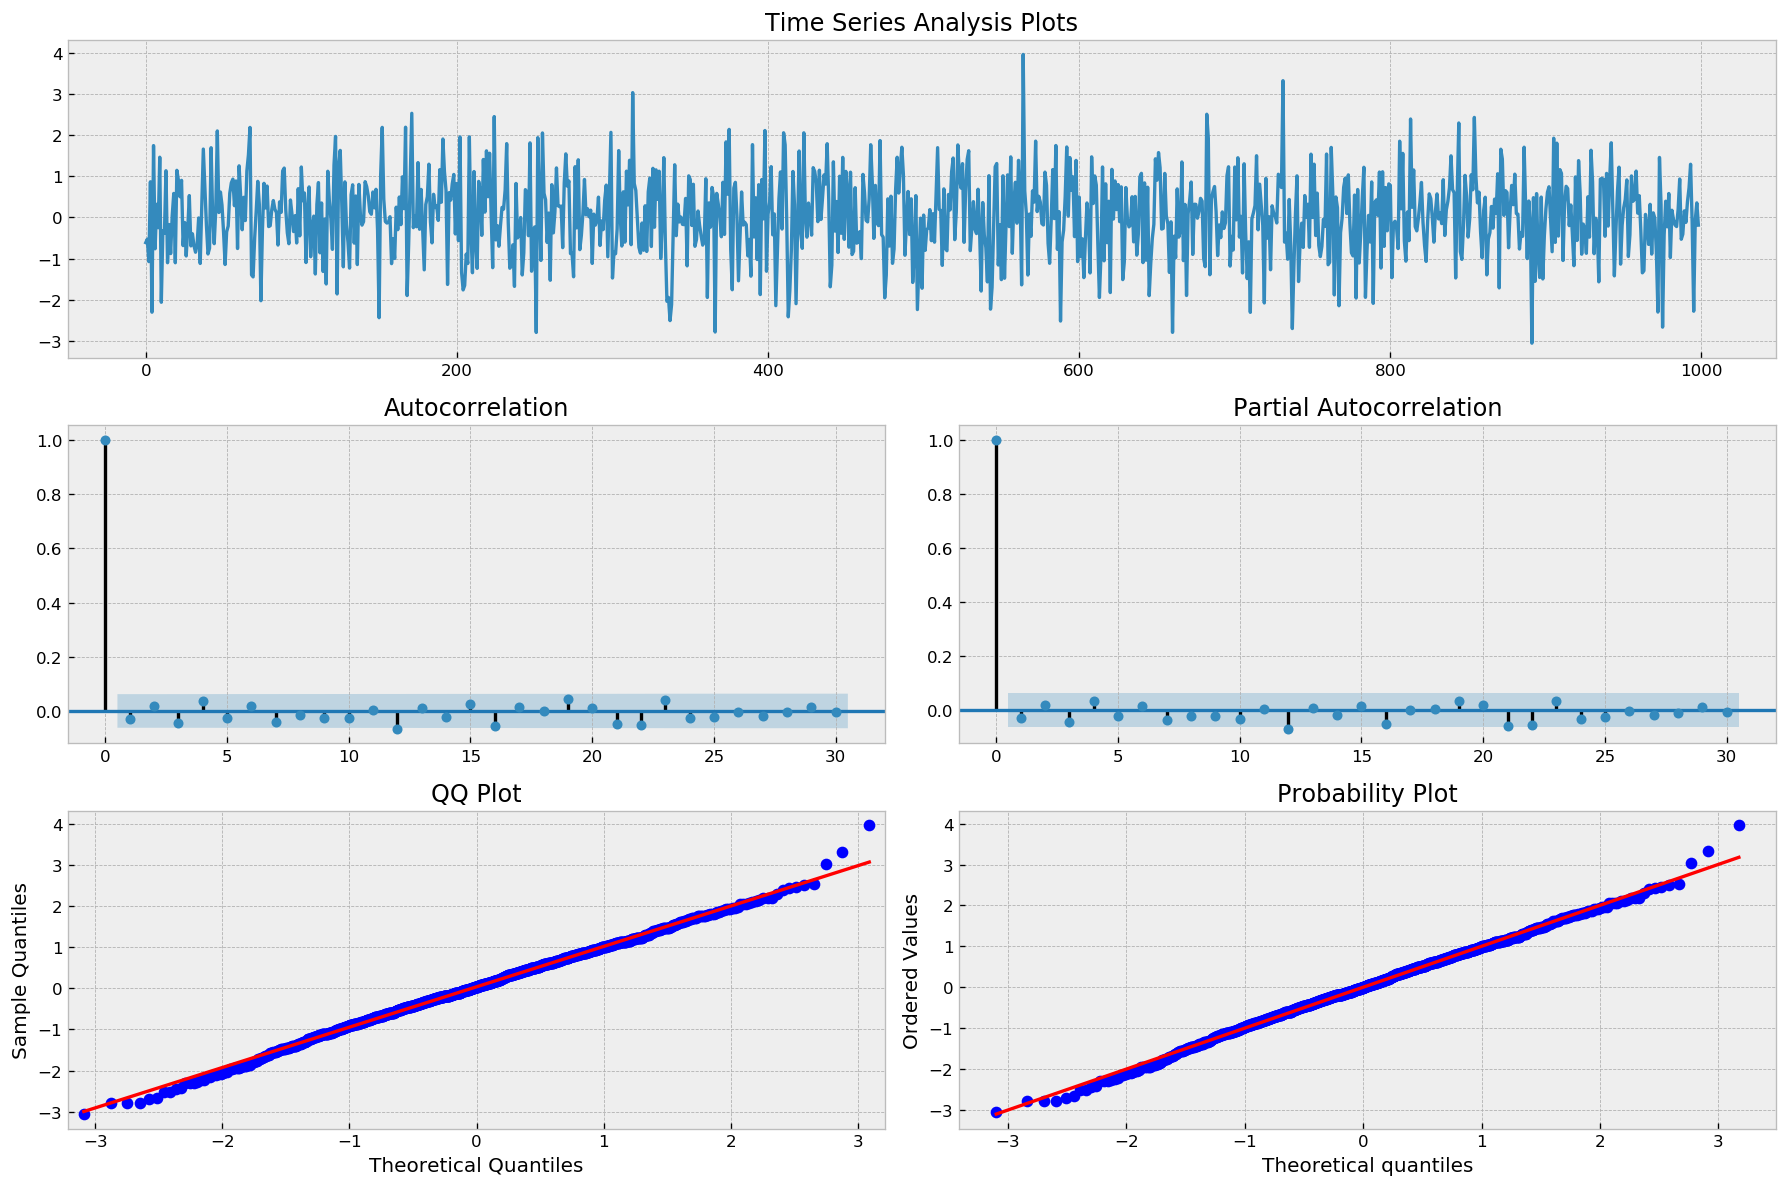

In [12]:
# First difference of simulated Random Walk series
_ = tsplot(np.diff(x), lags=30)

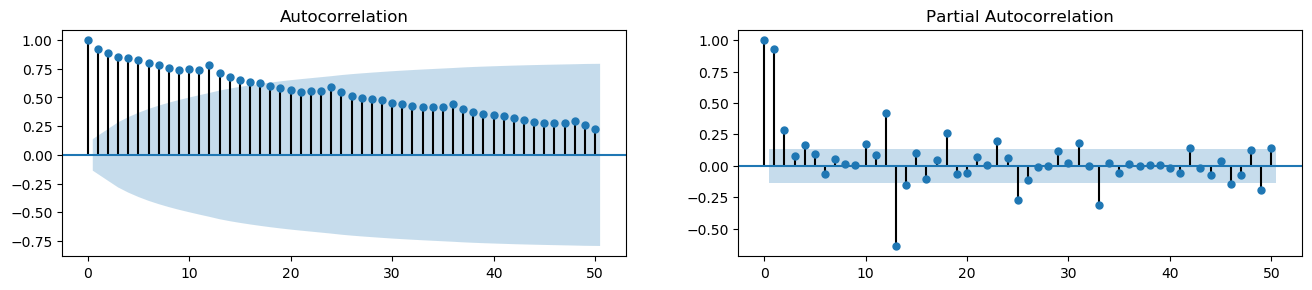

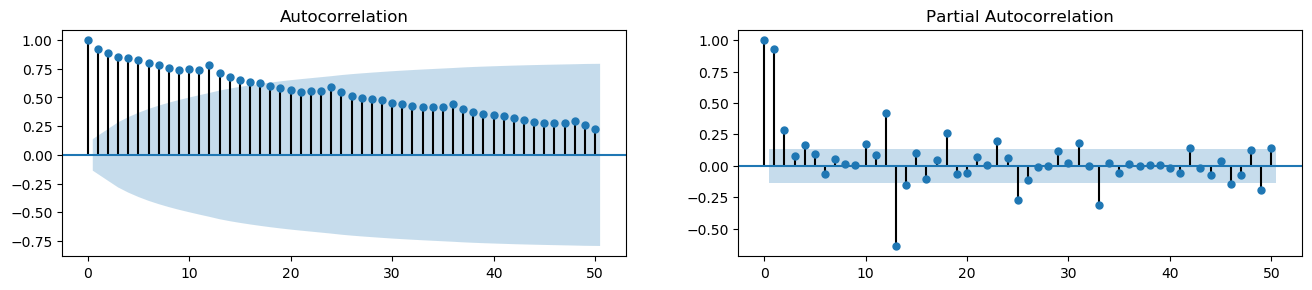

In [13]:

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')

# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df.value.tolist(), lags=50, ax=axes[0])
plot_pacf(df.value.tolist(), lags=50, ax=axes[1])

# Авторегрессия


Можно перейти к следующей идее: делать регрессию для ряда не на какие-то внешние признаки, зависящие
от времени, а на его собственные значения в прошлом:

$$y_t = α + φ_1 y_{t−1} + φ_2 y_{t−2} + · · · + φ_p y_{t−p} + ε_t.$$

В этом регрессионном уравнении $y_t$ — это отклик, $y_{t−1}, y_{t−2},\dots , y_{t−p}$ — признаки, $α, φ_1, φ_2, . . . , φ_p$ — параметры
модели, которые необходимо оценить, $ε_t$ — шумовая компонента, описывает отклонения значений ряда от
данного уравнения.


Такая модель называется моделью авторегрессии порядка p (AR(p)). В этой модели $y_t$ представляет собой
линейную комбинацию p предыдущих значений ряда и шумовой компоненты.



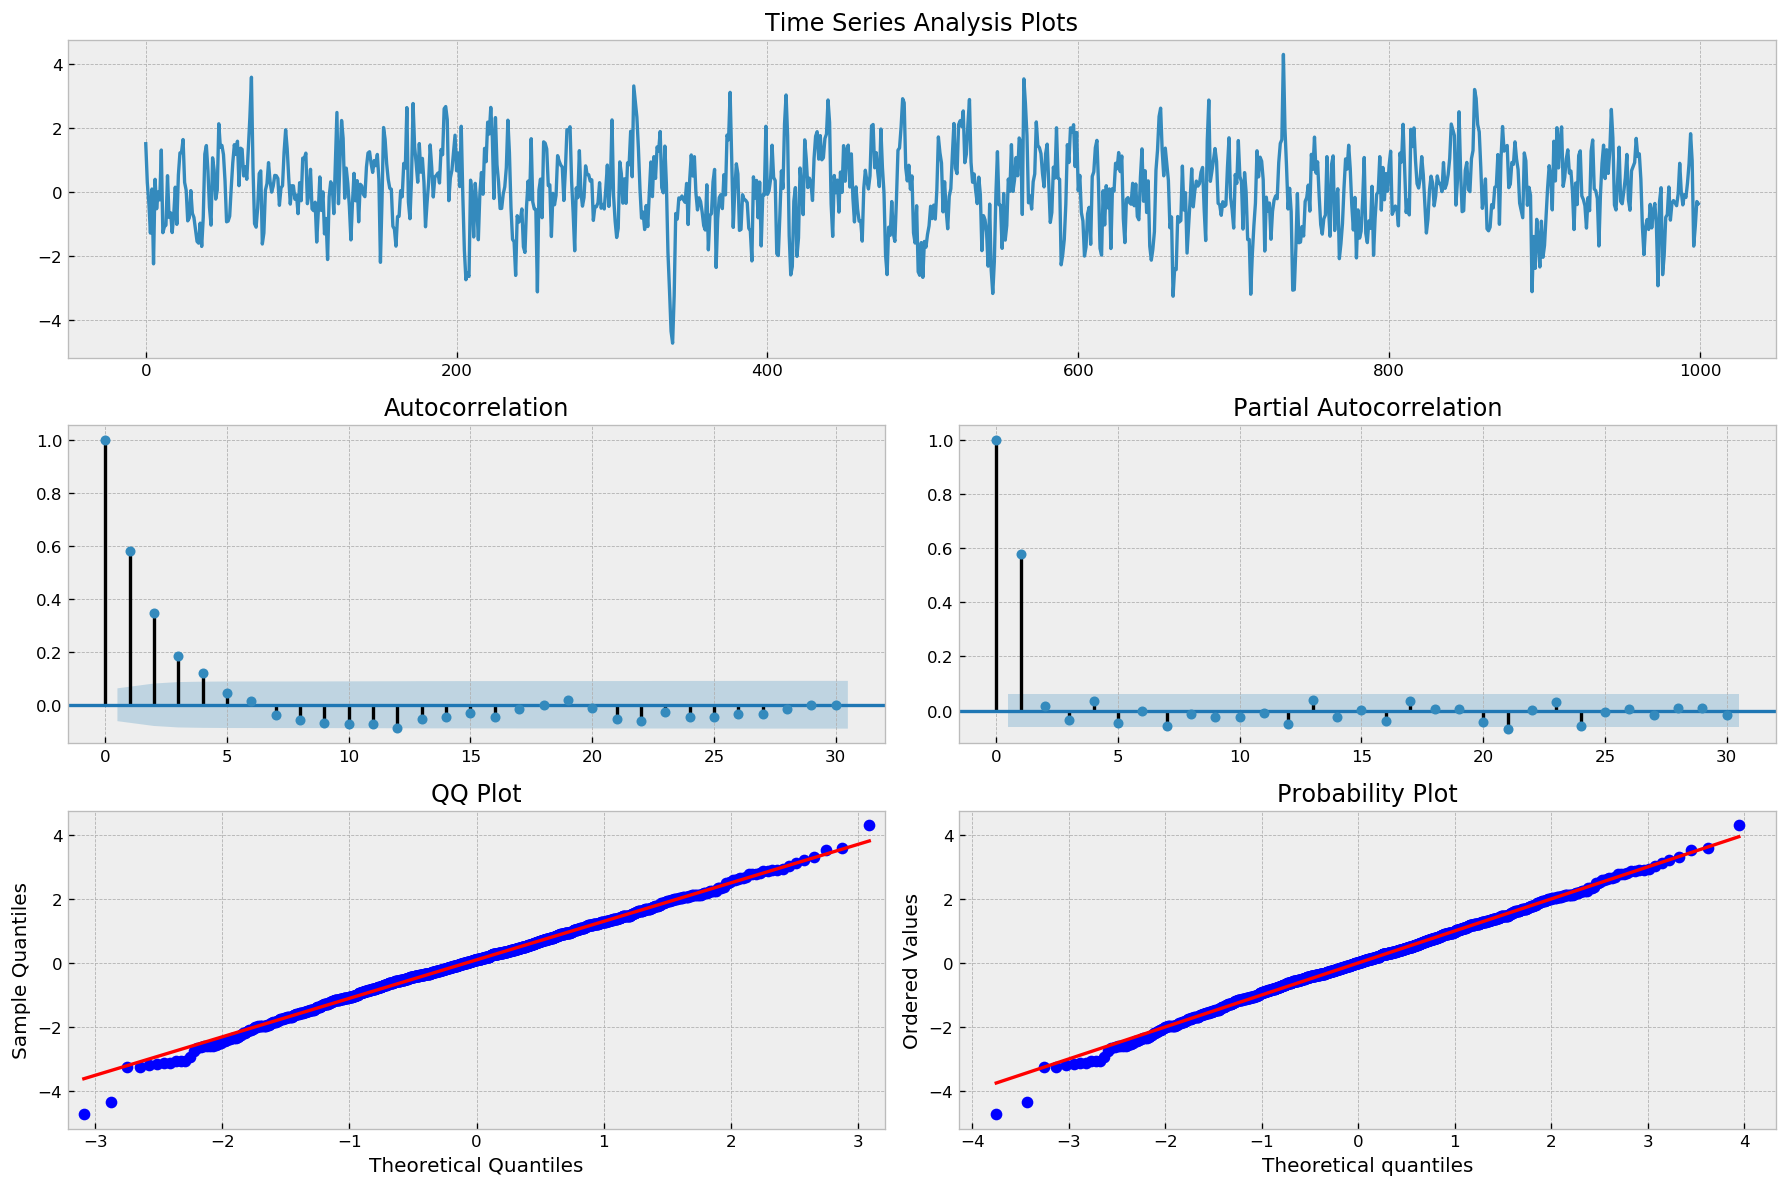

In [14]:
# Simulate an AR(1) process with alpha = 0.6

np.random.seed(1)
n_samples = int(1000)
a = 0.6
x = w = np.random.normal(size=n_samples)
lags = 30
for t in range(n_samples):
    x[t] = a*x[t-1] + w[t]
    
_ = tsplot(x, lags=lags)

# Скользящее среднее

Следующий класс моделей — это скользящее среднее. Чтобы лучше понимать, как они устроены, можно
начать с рассмотрения независимого, одинаково распределённый во времени шум $ε_t.$

Для каждого значения t можно вычислить среднее арифметическое между точками $ε_t$ и $ε_{t−1}.$ 
Также можно вычислять среднее не по двум, а по трём  или четырём  точкам и т.д. 


Данную идею можно обобщить и записать следующую модель ряда:
$$ y_t = α + ε_t + θ_1 ε_{t−1} + θ_2 ε_{t−2} + \dots + θ_q ε_{t−q},$$
где $ε_t, ε_{t−1}, . . . , ε_{t−q}$ — значения шума в q предыдущих моментов времени, $α, θ_1, θ_2, . . . , θ_q$ — это параметры
модели, которые необходимо оценить. Такая модель называется моделью скользящего среднего порядка q (MA(q)). 

В ней предполагается, что значение ряда $y_t$ — это линейная комбинация q последних значений шумовой компоненты.

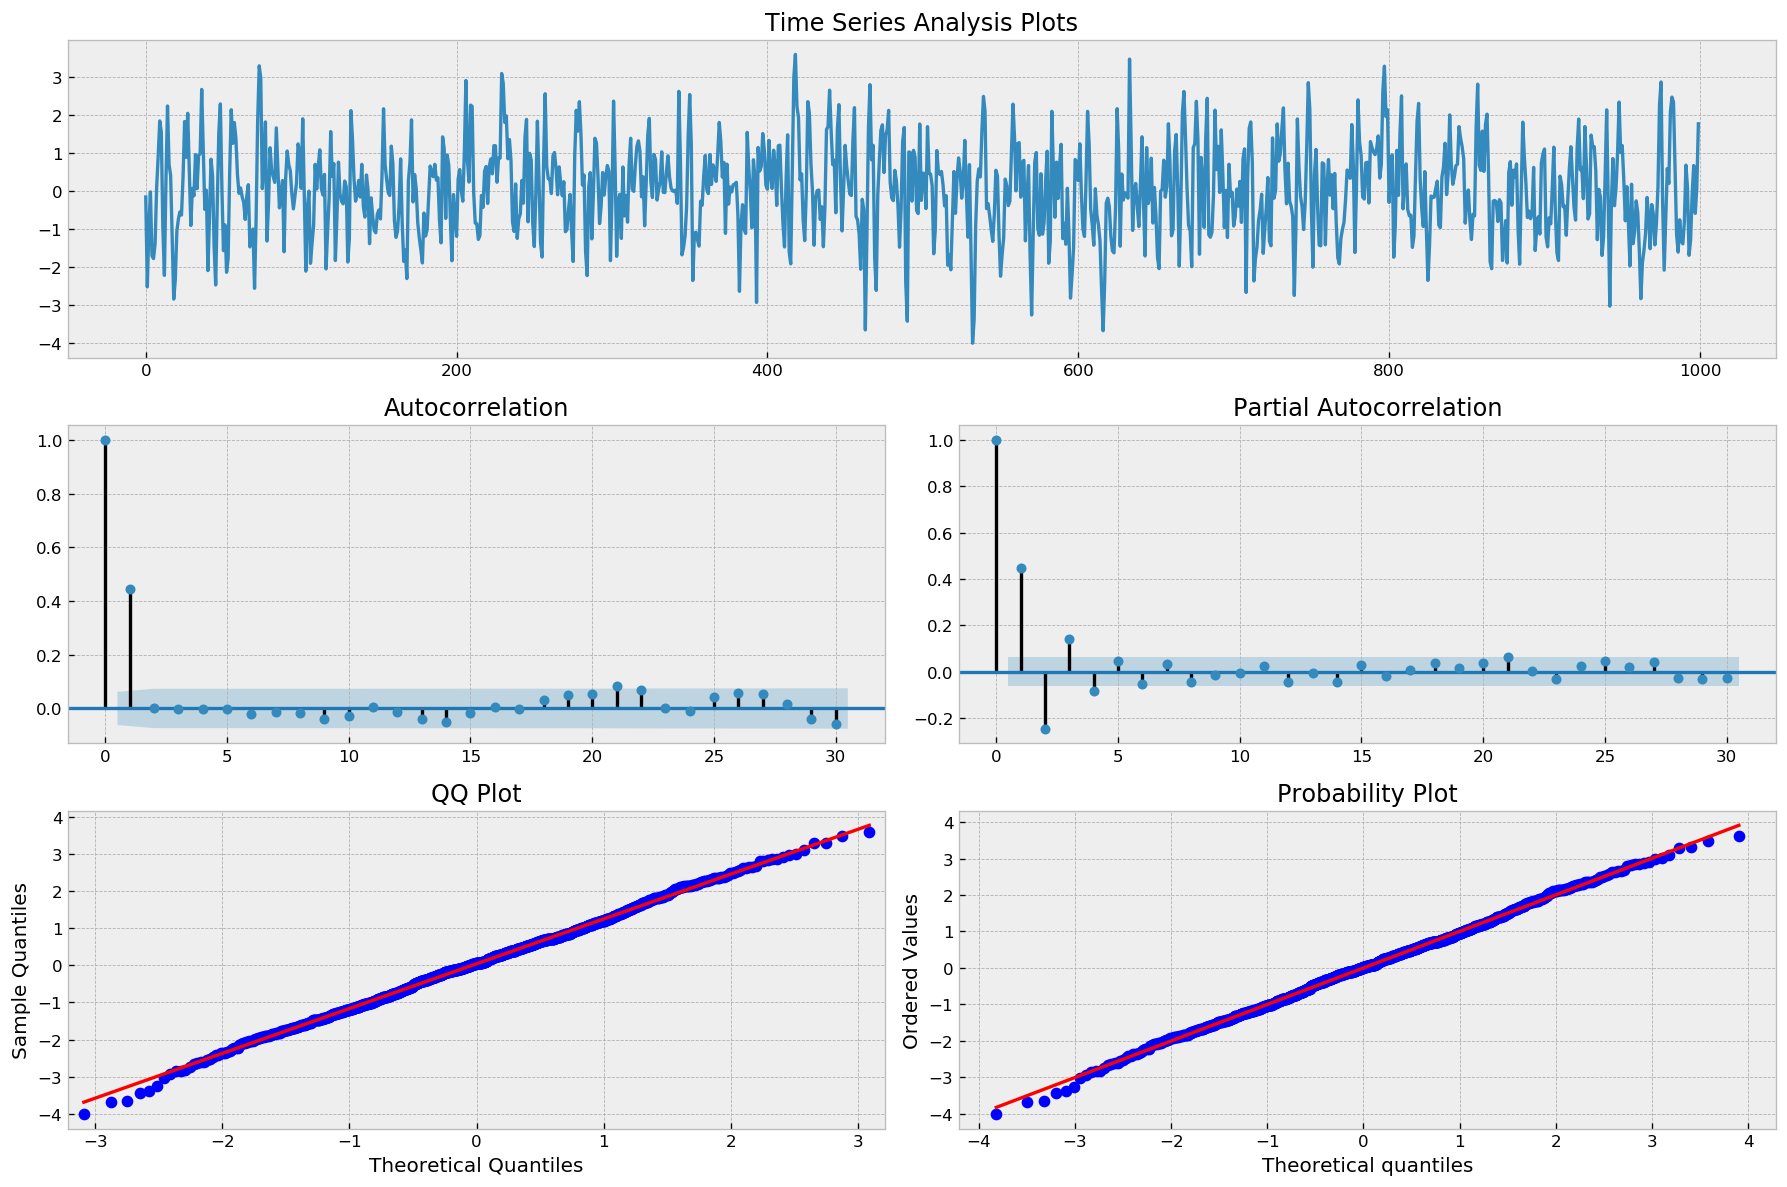

In [15]:
# Simulate an MA(1) process


import statsmodels.tsa as smt

n = int(1000)

# set the AR(p) alphas equal to 0
alphas = np.array([0.])
betas = np.array([0.6])

# add zero-lag and negate alphas
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]

ma1 = smt.arima_process.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
_ = tsplot(ma1, lags=30)

# ARMA
Можно проделать следующий трюк: взять авторегрессионную модель порядка p (AR(p)) и модель скользящего среднего порядка q (MA(q)) и сложить то, что находится у них в правых частях. 

Результат — это
модель ARMA(p, q), она выглядит следующим образом:
$$y_t = α + φ_1 y_{t−1} + φ_2 y_{t−2} + · · · + φ_p y_{t−p} + \varepsilon_t + θ_1 ε_{t−1} + θ_2 ε_{t−2} + \dots + θ_q ε_{t−q}.$$


Главное, что нужно знать об этой модели: **теорема Вольда** утверждает, что любой стационарный временной ряд может быть описать моделью ARMA(p, q) с правильным подбором значений параметров p, q. 

Это
прекрасный результат, который означает, что семейство моделей ARMA(p, q) достаточно богато для того,
чтобы в нём можно было найти хорошую модель, описывающую любой стационарный ряд.


# Построение модели временного ряда

Для моделирования будем использовать модель ARIMA, построенную для ряда первых разностей.


Чтобы построить модель нам нужно знать ее порядок, состоящий из 2-х параметров:

- p — порядок компоненты AR
- d — порядок интегрированного ряда
- q — порядок компонетны MA




#Как определить p и q. 

Для их определения нам надо изучить авторкорреляционную(ACF) и частично автокорреляционную(PACF) функции для ряда первых разностей.


ACF поможет нам определить q, т. к. по ее коррелограмме можно определить количество автокорреляционных коэффициентов сильно отличных от 0 в модели MA


PACF поможет нам определить p, т. к. по ее коррелограмме можно определить максимальный номер коэффициента сильно отличный от 0 в модели AR.


# ARIMA

Модели типа ARIMA — это обобщение модели класса ARMA.


На данный момент известны два факта:

1. Теорема Вольда: любой стационарный ряд может быть описан моделью ARMA(p, q) с любой наперёд
заданной точностью.

2. При помощи дифференцирования нестационарный ряд можно сделать стационарным.
Эти две идеи и лежат в основе моделей класса ARIMA. Модель ARIMA(p, d, q) — это модель ARMA(p, q)
для d раз продифференцированного ряда.



# SARMA

Настало время разобраться с сезонностью. Пусть ряд имеет сезонный период длины S. Тогда можно взять
модель ARMA(p, q):

$$y_t = α + φ_1 y_{t−1} + φ_2 y_{t−2} + \dots + φ_p y_{t−p} + \varepsilon_t + θ_1 ε_{t−1} + θ_2 ε_{t−2} + · · · + θ_q ε_{t−q}, $$
добавить к этой модели P авторегрессионных компонент, но не предыдущих, а с шагом, равным периодом
сезонности: $$+φ_S y_{t−S} + φ_{2S} y_{t−2S} + · · · + φ_{PS} y_{t−PS}$$
и Q компонент скользящего среднего, также с шагом, равным периодом сезонности:
$$+θ_S ε_{t−S} + θ_{2S} ε_{t−2S} + \dots + θ_{PS} ε_{t−QS}.$$


Результат — это модель SARMA(p, q) × (P, Q).

# SARIMA

Модель SARIMA(p, d, q) × (P, D, Q) — модель SARMA(p, q) × (P, Q) для ряда, к которому d раз было
применено обычное дифференцирование и D раз — сезонное. Такую модель часто называют просто ARIMA:
первая буква не пишется, но подразумевается, что сезонная компонента тоже может быть.

 Параметры d, D, q, Q, p, P можно считать гиперпараметрами, поскольку они определяют структуру и количество коэффициентов в самой модели ARIMA.
Остальные параметры, α, φ, θ, являются коэффициентами в регрессионном уравнении.

# Параметры α, φ, θ

Если зафиксированы параметры d, D, q, Q, p, P, то есть зафиксирована структура модели ARIMA, то
параметры α, φ, θ можно подобрать с помощью метода наименьших квадратов. Фактически происходит настраивание привычной регрессии методом минимизации квадратичной ошибки.

Единственный трюк заключается в определении коэффициентов θ, которые стоят при шумовых компонентах из прошлого. Наблюдать шумовые компоненты невозможно, поэтому, чтобы подставить их в регрессионное уравнение, их нужно предварительно оценить. Обычно оценка производится с помощью остатков от
авторегрессии, которая предварительно строится по исследуемым данным.


Если шум, который стоит в модели ARIMA, является белым (независимый, одинаково распределённый,
гауссовский), то метод наименьших квадратов даёт оценки максимального правдоподобия для параметров
α, φ, θ, то есть заведомо известно, что эти оценки хороши.

# Параметры d, D

Параметры d, D, которые задают порядки дифференцирования, необходимо подбирать так, чтобы ряд стал
стационарным. Ранее уже упоминалось, что всегда рекомендуется начинать с сезонного дифференцирования,
потому что уже после него ряд может оказаться стационарным. Дело в том, что выгодно дифференцировать
ряд как можно меньше раз, потому что с увеличением количества дифференцирований растёт дисперсия
итогового прогноза.



# Параметры q, Q, p, P

К сожалению, гиперпараметры q, Q, p, P нельзя выбирать из принципа максимума правдоподобия. Например, чем больше значение параметра p, тем больше авторегрессионных компонент в итоговом уравнении, тем
больше параметров φ и тем лучше это уравнение описывает данные. Чем больше значения гиперпараметров,
тем больше параметров в модели и тем она сложнее. Таким образом, с увеличением значения этих гиперпараметров значение правдоподобия может только увеличиваться. Поэтому для сравнения моделей с разным
количеством параметров необходим другой критерий.


В качестве искомого критерия можно использовать, например, критерий Акаике:
$$ AIC = −2 \ln L + 2k,$$
где L — правдоподобие, k = P + Q + p + q + 1 — число параметров в модели.


Оптимальной по критерию Акаике будет модель с наименьшим значением этого критерия. Такая модель,
с одной стороны, будет достаточно хорошо описывать данные, а с другой — содержать не слишком большое
количество параметров.

AIC тесно связан с байесовским информационным критерием BIC, но, в отличие от него, содержит функцию штрафа, линейно зависящую от числа параметров.

$$BIC=−2 \ln(L)+k \ln ( n ),$$

где 
L — максимальное значение функции правдоподобия наблюдаемой выборки с известным числом параметров, k — число параметров модели, n — объем обучающей выборки.


В конечном итоге значения параметров q, Q, p, P определяются перебором: из разных значений гиперпараметров выбираются те, у которых значение критерия Акаике будет минимальным. Начальные приближения
для этого перебора можно выбрать с помощью автокорреляционной функции.


# Подбор ARIMA


Итоговый алгоритм подбора модели в классе ARIMA состоит в следующем:

• В первую очередь необходимо построить график ряда и посмотреть на него. Уже из визуального анализа можно сделать определённые выводы: есть ли в данных сезонность, какой сезонный период, есть
ли в ряде пропуски и выбросы, необходимо ли стабилизировать дисперсию, стоит ли исключить из
рассмотрения начало ряда, потому что значения в начале совсем не похожи на значения в конце.

• Следующий шаг — это стабилизация дисперсии при необходимости. Стабилизация производится с помощью метода Бокса-Кокса или логарифмированием, что является частным случаем того же метода.
• Если исследуемый ряд нестационарен, необходимо подобрать порядок дифференцирования, при котором
он становится стационарным. Таким образом фиксируются параметры d, D модели ARIMA.

• Далее необходимо построить графики автокорреляционной функции (ACF) и частичной автокорреляционной функции (PACF) и из этих графиков определить примерные значения параметров p, q, P, Q.
Фактически эти значения — начальные приближения, с которых начинается перебор разных моделей.

• Полученные модели необходимо обучить, сравнить их по информационному критерию Акаике и выбрать
ту, которая его минимизирует.

• Необходимо посмотреть на остатки получившейся модели, чтобы понять, насколько хорошей она получилась, можно ли, теоретически, её улучшить, нет ли в ней каких-то видимых недостатков. 

# Прогноз

Пусть модель построена, определены значения всех неизвестных параметров, получены их оценки $ \hat α,  \hat φ, \hat θ,$
которые записаны в этом уравнении:
$$y_t = \hat α + \hat φ_1 y_{t−1} + · · · +\hat  φ_p y_{t−p} + ε_t + \hat θ_1 ε_{t−1} + · · · + \hat  θ_q ε_{t−q}.$$


Чтобы построить прогноз на момент времени T + 1, нужно в этом уравнении заменить все индексы t на
T + 1:
$$
\hat y_{T +1|T} = \hat α + \hat  φ_1 y_T + \dots + \hat  φ_p y{T +1−p} + ε_{T+1} + \hat  θ_1ε_T + \dots +  \hat θ_q ε_{T +1−q}. $$

В этом уравнении присутствует значение ошибки из будущего $ε_{T +1}.$ 

Неизвестно, какой будет наблюдаться
шум в будущем, однако можно предполагать, что в среднем он будет равен 0. 


Поэтому значения будущих
ошибок можно безболезненно заменить на 0. Фактически из уравнения просто удаляются все члены, которые
связаны с ошибками из будущего:

$$\hat  y_{T +1|T} = \hat  α + \hat  φ_1 y_T + \dots + \hat  φ_p y_{T +1−p} + \hat  θ_1 ε_T + \dots + \hat  θ_q ε_{T +1−q}.$$


В уравнении также присутствуют ошибки из прошлого. Их необходимо заменить на остатки модели в этих
точках, потому они являются самыми лучшими оценками ошибок из имеющихся:

$$
\hat y_{T +1|T }= \hat  α +\hat  φ_1 y_T + \dots + \hat  φ_p y_{T +1−p} + \hat  θ_1 \hat ε_T +\dots + \hat θ_q \hat ε_{T +1−q}.
$$

Если прогноз необходимо построить не на одну точку вперёд, а, например, на две, то в формуле появляется
значение ряда из будущего $y_{T +1}$:

$$ \hat  y_{T +2|T} = \hat  α + \hat  φ_1y_{T +1} + · · · +\hat  φ_p y_{T +2−p} + \hat  θ_1 \hat  ε_{T +1} + · · · + \hat  θ_q \hat ε_{T +2−q}.$$ 


Его необходимо заменить на прогноз $ \hat y_{T +1|T} .$



 # Анализ остатков

Анализ остатков — это техника, которая помогает понять, есть ли у прогнозирующей модели небольшие
недостатки, которые можно устранить доработкой, или же фундаментальные проблемы.

Остатки — это разность между фактом и прогнозом:
$$\hat ε_t = y_t − \hat y_t.$$

Их можно вычислять двумя способами. 

1. Прогнозы, которые участвуют в остатках, можно строить
с фиксированной отсрочкой. Например, начиная с момента R прогноз всегда делается на одну точку вперёд,
затем происходит переход в момент R + 1, получается новое истинное значение ряда, которое сравнивается с
прогнозом, затем следующий прогноз делается ещё на одну точку вперёд, и так далее до самого конца ряда:
$$\hat y_{R+d|R}, \dots , \hat y_{T|T −d}.$$


2. Остатки можно строить с фиксированным концом истории при разных отсрочках. Например,
берётся начальная часть ряда от 0 до T − D, и далее делаются прогнозы


$$ \hat y_{T −D+1|T −D},\dots , \hat y_{T|T −D},$$
полученные прогнозы сравниваются с истинными значениями ряда, и с их помощью вычисляются остатки.


В зависимости от задачи могут использоваться разные определения остатков, однако чаще используется
первое. Остатки оценивают ошибку, то есть шумовую компоненту, которую наблюдать невозможно. При
построении модели делаются предположения об этой шумовой компоненте, и логично, что свойства остатков
должны согласовываться с выдвинутыми предположениями.


# Несмещённость
Во-первых, остатки должны быть несмещёнными, то есть в среднем они должны быть равны нулю.

Гипотезу о несмещённости остатков $H_0 : ε = 0$ можно формально проверить с помощью какого-либо стандартного одновыборочного критерия (например, критерия Стьюдента или Уилкоксона). Если выясняется,
что остатки смещены, значит с моделью что-то не так. В этом случае рекомендуется провести визуальный
анализ, чтобы посмотреть, почему прогнозы систематически завышаются или занижаются.


На самом деле, модель очень легко скорректировать в случае, если остатки имеют смещение. Достаточно
вычислить среднее значение остатков, это и будет константой, на которую необходимо скорректировать все
прогнозы, чтобы остатки стали несмещёнными. После этого преобразования прогнозирующая модель улучшится.

# Стационарность

Ещё одно свойство, наличие которого предполагается у ошибок, — это стационарность, то есть отсутствие
зависимости от времени. Таким образом, остатки во времени должны быть распределены примерно одинаково.

Формально гипотезу о стационарности можно проверить с помощью критерия Дики-Фуллера. Если стационарность отсутствует, то модель неодинаково точна в разные периоды времени. Необходимо провести
визуальный анализ, чтобы понять, что с моделью не так, и почему прогнозы в разные периоды времени
систематически имеют разную ошибку.

 # Неавтокоррелированность


Ещё одно желаемое свойство остатков — это неавтокоррелированность, то есть отсутствие зависимости от
предыдущих наблюдений.


Гипотезу о неавтокоррелированности можно проверить по коррелограмме, а также с помощью Q-критерия Льюнга-Бокса (таблица 1.3). Этот критерий позволяет проверить гипотезу о равенстве нулю одновременно
нескольких автокорреляций при разных лагах (с лага 1 по лаг Q). Параметр Q можно выбирать, например,
перебором, а можно пользоваться значением по умолчанию, использующемся в функции, которая производит
оценку модели ARIMA.

ряд ошибок прогноза: $ε^T = ε_1, \dots, ε_T$
нулевая гипотеза: $H_0 : r_1 = · · · = r_Q = 0$
альтернатива: $H_1 : H_0 $ неверна
статистика: $Q(ε^T)= T (T + 2)\sum_{\tau=1}^Q \frac{r^2_τ}{T −τ}$
нулевое распределение: $Q(ε^T) ∼ χ^2_{Q−K}$ при $H_0$, 
K — число настраиваемых параметров модели.




Автокоррелированность остатков — признак того, что в данных присутствует информация, которая не
вошла в модель. 

Если в остатках есть структура, то можно попытаться её внести в модель явным образом.


Скорректированная модель будет лучше, а её остатки будут больше похожи на белый шум. 

Таким образом, автокоррелированность остатков только указывает на
потенциальную возможность улучшить модель, и не факт, что улучшения можно добиться на практике с
помощью рассматриваемого класса моделей.

# ARIMAX

Пусть считается, что значение ряда y в момент времени t задаётся следующим образом:
$$y_t = \sum_{j=1}^k
β_jx_{jt} + z_t,$$
то есть фактически y задаётся линейной регрессией, но остатки этой регрессии прогнозируются при помощи
модели ARIMA:


$$z_t = α + φ_1 z_{t−1} + \dots + φ_p z_{t−p} + θ_1 ε_{t−1} + \dots + θ_q ε_{t−q}+
+ φ_S z_{t−S} + \dots + φ_{PS} z_{t−PS} + θ_S ε_{t−S} + \dots + θ_{PS} ε_{t−PS} + ε_t.$$


Такая модель, которая комбинирует линейную регрессию и ARIMA называется regARIMA или ARIMAX.

Описанная выше модель очень полезна при работе с рядами со сложной сезонностью. 


К сожалению, модели класса ARIMA дают плохие результаты при работе с рядами со сложной сезонностью. Возникает несколько проблем. 2

Во-первых, при длинных сезонных периодах в модели ARIMA становится
слишком много параметров, и их невозможно оценить по ряду.


Во-вторых, модель ARIMA явно задаёт значение ряда как функцию от его значения, например, один
сезонный период назад. Странно ожидать, что при работе с подневным рядом его значение будет определяться
значением в эту же дату прошлого года. Скорее всего, значения ряда в некой окрестности текущей даты
похоже на его значения в этой же самой окрестности этой же даты год назад.


Наконец, довольно большую проблему представляет то, что длина года нецелая. Она равна не в точности
365 дням, а 365.25. Если в ряду собраны недельные данные, то длина года в неделях также не 52 недели
ровно, а 52.18. 

С этой проблемой ARIMA не может работать никак, в ряде нет измерения с индексом 52.18,
которое можно было бы подставить в модель.


Решить эту проблему можно в рамках регрессионного подхода. Для модели ARIMA можно оставить самый
короткий из имеющихся сезонных периодов. Все остальные периоды будут учитываться с помощью регрессии
на специально построенные признаки. В качестве признаков будут выступать фурье-гармоники с периодами,
пропорциональными длине сезонных периодов (например, 365.25, 365.25/2, 365.25/3 и т.д.). Какое-то количество таких гармоник необходимо подставить как регрессионную компоненту в регрессионную ARIMA.


# Регрессионные признаки

• гармоники по длинным периодам сезонности;

• для коротких периодов сезонности можно использовать индикаторы (например, дни недели можно явно
задать как индикатор понедельника, индикатор вторника, и т. д.) и в явном виде подставить их в
регрессионную ARIMA;

• индикаторы праздников;

• полезными часто оказываются индикаторы пред- и постпраздничных дней;

• тренды (линейный, квадратичный и т. д.);

• скользящие средние ряда за предыдущие периоды (например, в каждой точке вычисляется среднее за
прошлый месяц или прошлую неделю, и такой признак подставляется в регрессионную ARIMA).

